In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


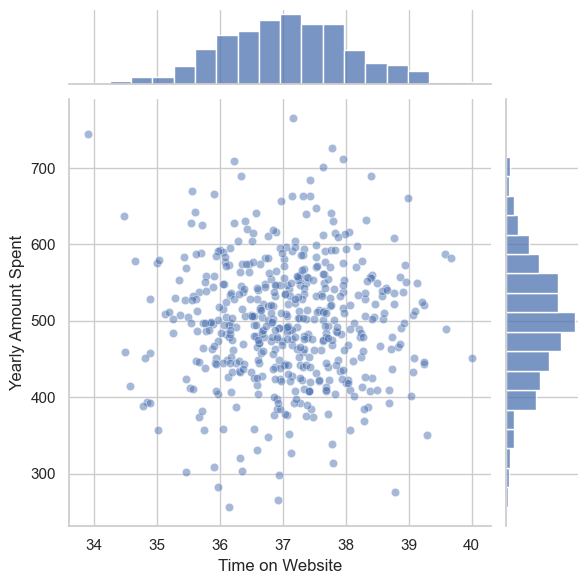

In [46]:
# time on website vs yearly amount spent
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, alpha=0.5)

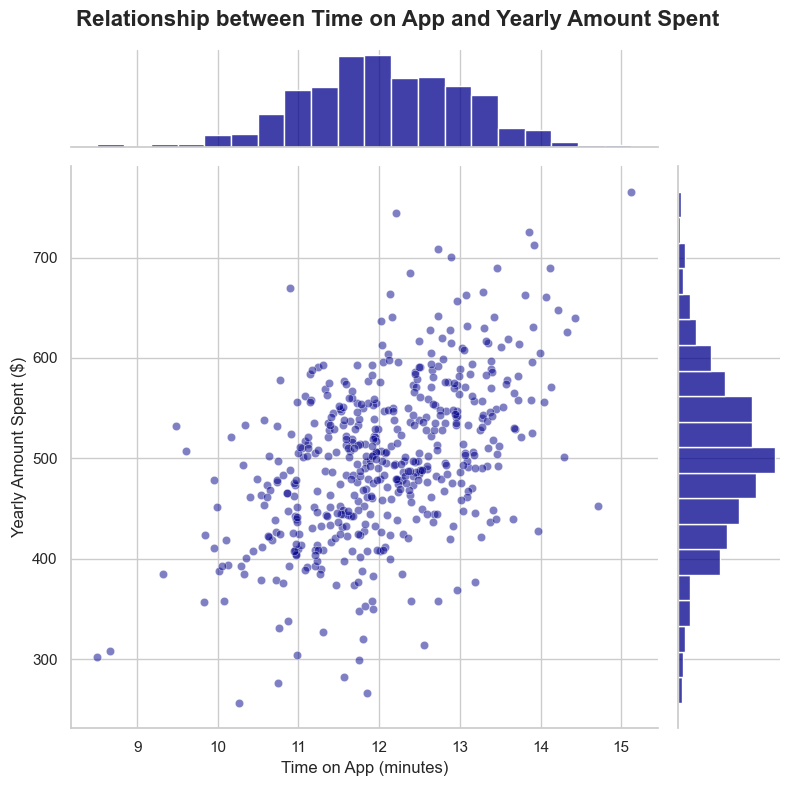

In [14]:
sns.set_theme(style="whitegrid")
plot = sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, 
                     kind='scatter', alpha=0.5, color='darkblue', height=8)
plot.fig.suptitle('Relationship between Time on App and Yearly Amount Spent', 
                  fontsize=16, weight='bold')
plot.set_axis_labels('Time on App (minutes)', 'Yearly Amount Spent ($)', fontsize=12)
plot.ax_joint.spines['top'].set_visible(False)
plot.ax_joint.spines['right'].set_visible(False)
plt.subplots_adjust(top=0.93)

plt.show()

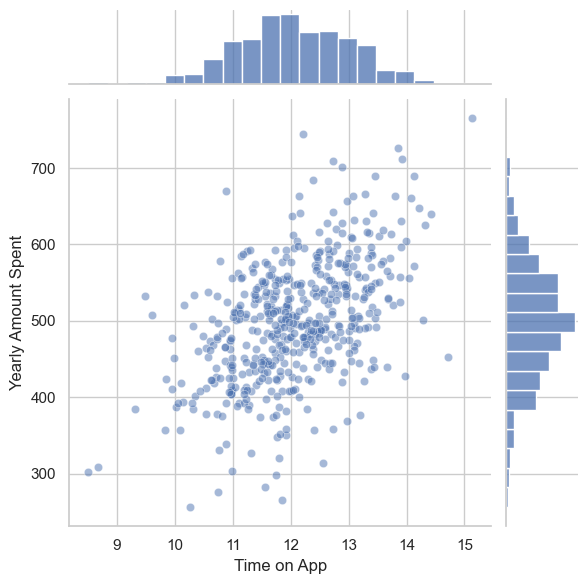

In [45]:
# time on app vs yearly amount spent
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, alpha=0.5)

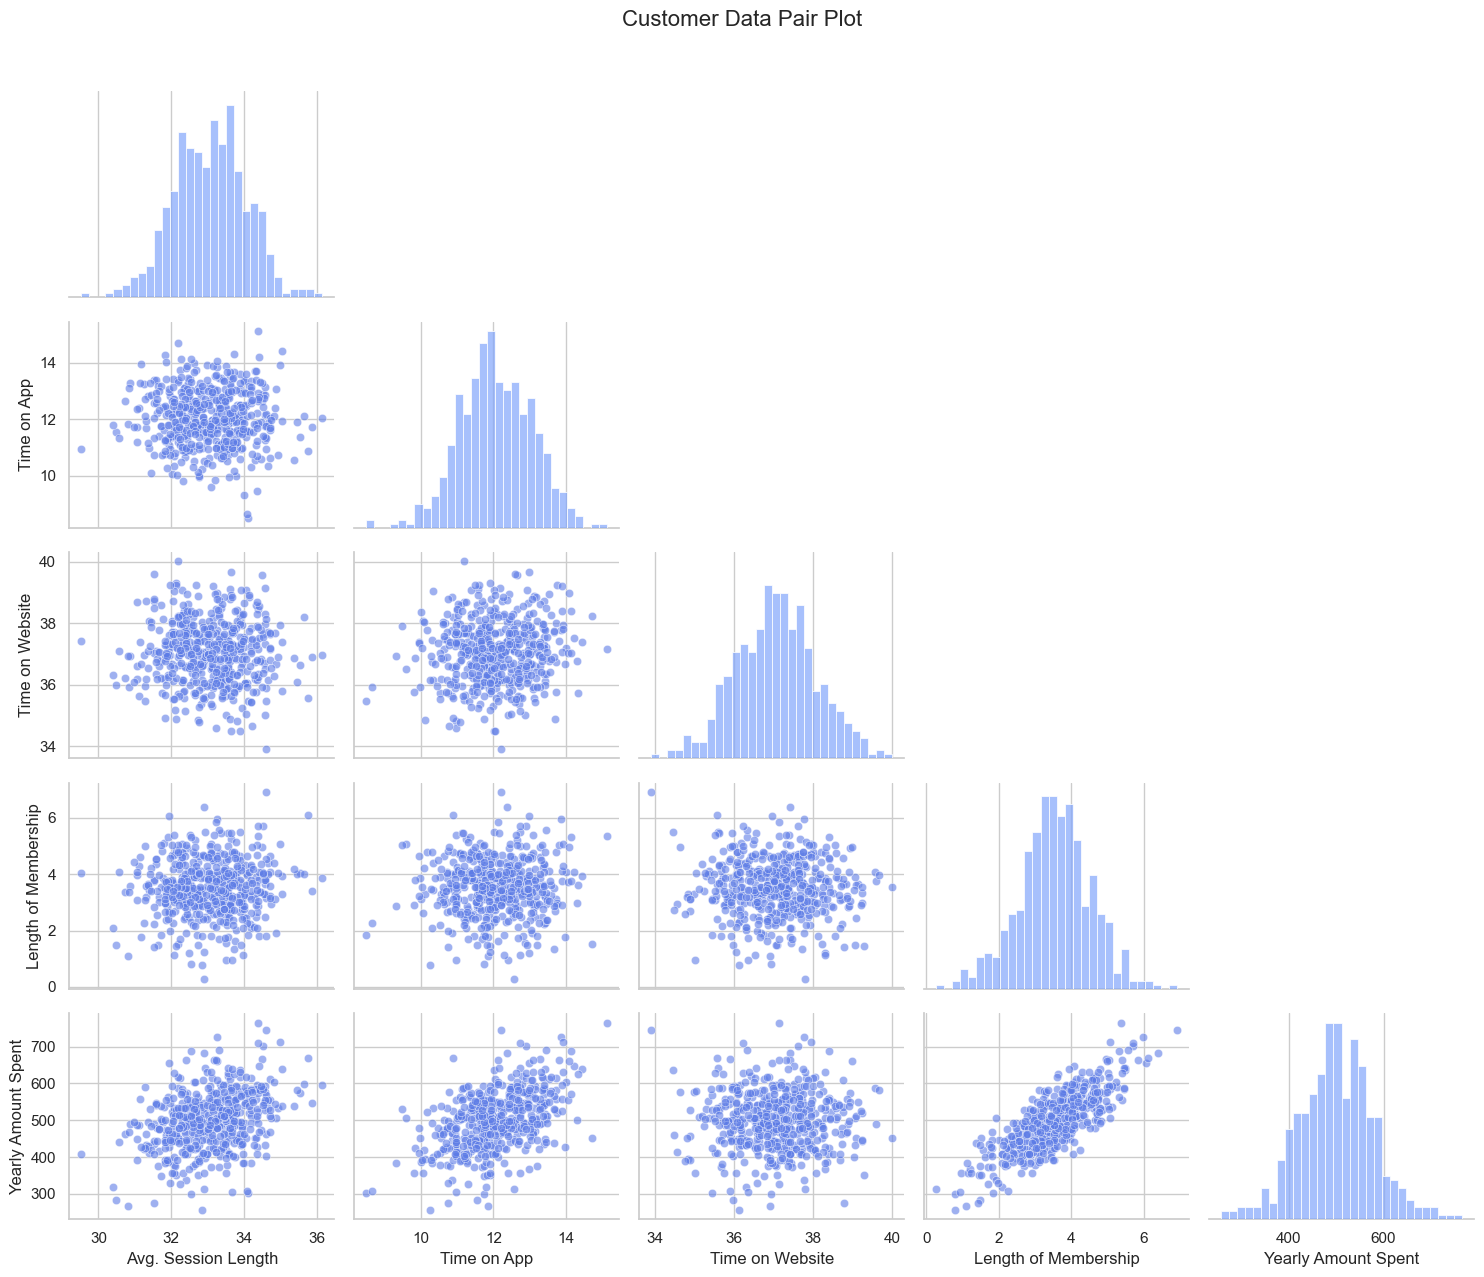

In [15]:
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", len(customers.columns))
g = sns.pairplot(customers, 
                 kind='scatter', 
                 plot_kws={'alpha': 0.6, 'color': palette[0]}, 
                 diag_kws={'alpha': 0.7, 'bins': 30, 'color': palette[1]},
                 corner=True, 
                 height=2.5,  
                 aspect=1.2)  

g.fig.suptitle("Customer Data Pair Plot", y=1.02, fontsize=16)  
plt.tight_layout()
plt.show()

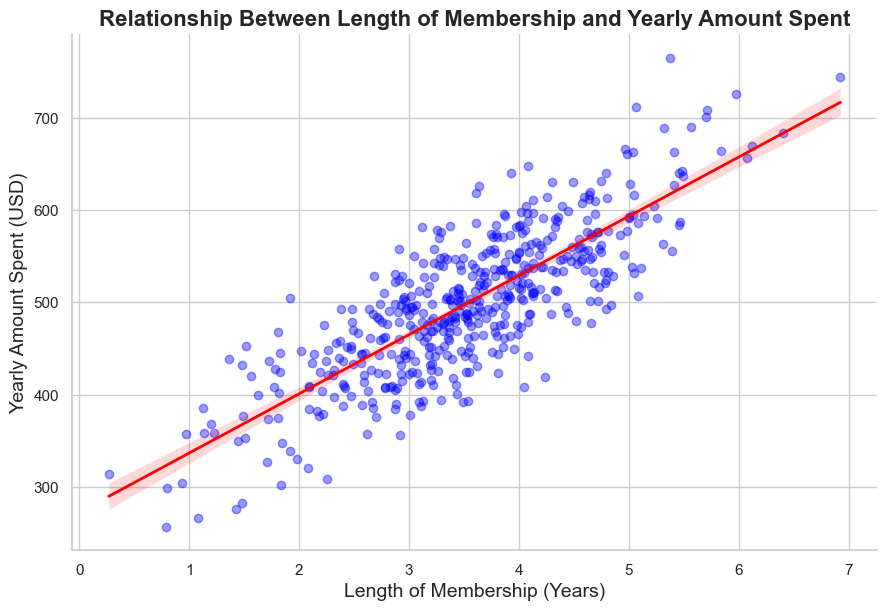

In [21]:
sns.set(style="whitegrid")

# Create the lmplot with customizations
sns.lmplot(x='Length of Membership', 
           y='Yearly Amount Spent', 
           data=customers,
           scatter_kws={'alpha': 0.4, 'color': 'blue'},
           line_kws={'color': 'red', 'lw': 2}, 
           height=6, 
           aspect=1.5)

# Add labels and title
plt.title('Relationship Between Length of Membership and Yearly Amount Spent', fontsize=16, fontweight='bold')
plt.xlabel('Length of Membership (Years)', fontsize=14)
plt.ylabel('Yearly Amount Spent (USD)', fontsize=14)

# Show the plot
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [24]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [25]:
X.head()
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [31]:
lm.score(X, y)

0.9842821675307221

In [32]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


In [34]:
import statsmodels.api as sm

In [35]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Tue, 22 Oct 2024   Prob (F-statistic):          3.46e-315
Time:                         16:47:49   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [36]:
predictions = lm.predict(X_test)

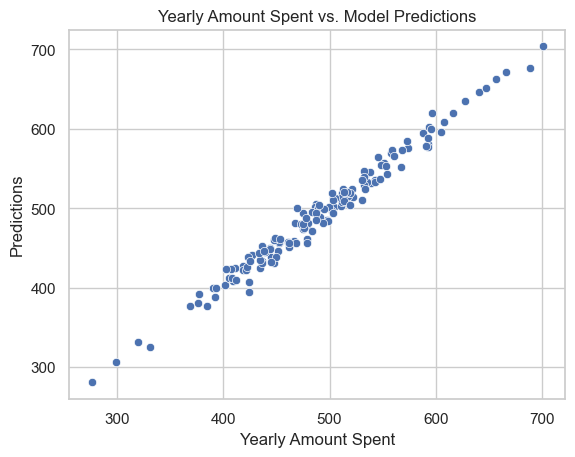

In [38]:
sns.scatterplot(x=y_test, y=predictions)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [40]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.42609164143211
Mean Squared Error: 103.9155413650334
Root Mean Squared Error: 10.193897260863158


/var/folders/9c/835pmmn906q7xz6krj5mv9pm0000gn/T/ipykernel_3610/339810671.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

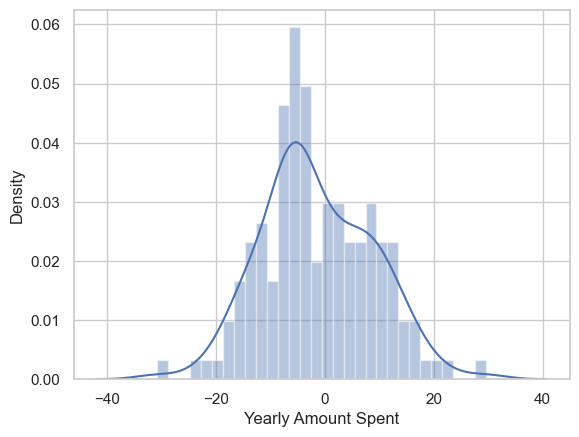

In [43]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

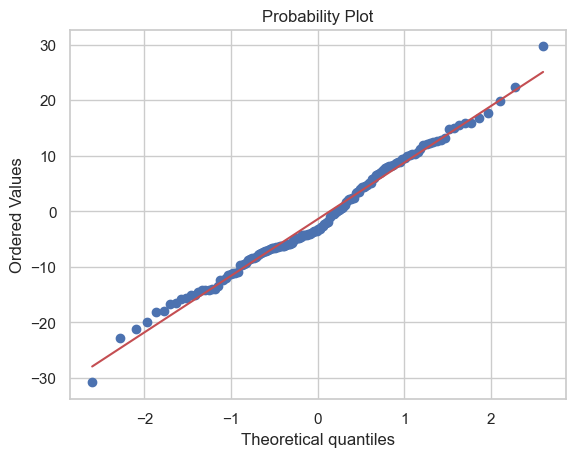

In [44]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()
